# **Loan Status Prediction with Unbalanced Logistic Regression**


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import seaborn as sns

warnings.simplefilter(action='ignore', category='FutureWarnings')

In [2]:
data = pd.read_csv(r"C:\Users\Liza Polozenko\OneDrive\Рабочий стол\ML\DATA SCIENCE\PROJECT\datasets\loan_data.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


### **Dataset analysis and cleaning**

#### Checking for missing values

In [3]:
data.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

#### Some columns have missing values ​​less than 5% of the total number of values. So we can delete the rows with these missing values.

In [5]:
df_no_null = data.copy()

df_no_null = df_no_null.dropna(subset=['Gender', 'Dependents', 'Loan_Amount_Term']).reset_index(drop=True)

df_no_null.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        20
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

#### The Self_Employed column is a bit more difficult. After analyzing the column, we can conclude that empty values ​​can be replaced with "NO".

In [6]:
df_no_null['Self_Employed'].value_counts()

Self_Employed
No     306
Yes     32
Name: count, dtype: int64

In [7]:
df_no_null['Self_Employed'] = df_no_null['Self_Employed'].fillna("No")

df_no_null.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

#### Credit_History was probably the hardest to solve. After much analysis, I decided that the best solution would be to replace the missing values ​​with "unavailable".

In [8]:
df_no_null['Credit_History'].value_counts()

Credit_History
1.0    282
0.0     46
Name: count, dtype: int64

In [9]:
df_no_null['Credit_History'] = df_no_null['Credit_History'].fillna("unavailable")
df_no_null.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
df_no_null['Credit_History'].value_counts()

Credit_History
1.0            282
0.0             46
unavailable     30
Name: count, dtype: int64

#### Let's check the updated table without missing values

In [11]:
df_no_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            358 non-null    object 
 1   Gender             358 non-null    object 
 2   Married            358 non-null    object 
 3   Dependents         358 non-null    object 
 4   Education          358 non-null    object 
 5   Self_Employed      358 non-null    object 
 6   ApplicantIncome    358 non-null    int64  
 7   CoapplicantIncome  358 non-null    float64
 8   LoanAmount         358 non-null    float64
 9   Loan_Amount_Term   358 non-null    float64
 10  Credit_History     358 non-null    object 
 11  Property_Area      358 non-null    object 
 12  Loan_Status        358 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 36.5+ KB


In [12]:
df_no_null

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
354,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
355,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
356,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


#### Transformation of categorical variables

In [13]:
df_dummies = df_no_null.copy()

df_dummies['Gender'] = df_dummies['Gender'].map({"Male": 0, "Female":1})
df_dummies

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,0,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,0,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,0,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,0,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,0,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,LP002953,0,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
354,LP002974,0,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
355,LP002978,1,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
356,LP002979,0,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [14]:
df_no_null['Credit_History'].value_counts()

Credit_History
1.0            282
0.0             46
unavailable     30
Name: count, dtype: int64

In [15]:
df_dummies_1 = df_no_null.copy()

df_dummies_1['Gender'] = df_dummies_1['Gender'].map({"Male": 0, "Female":1})
df_dummies_1['Married'] = df_dummies_1['Married'].map({"Yes": 1, "No": 0})
df_dummies_1['Dependents'] = df_dummies_1['Dependents'].map({"0":0, "1":1, "2": 2, "3+": 3})
df_dummies_1['Education'] = df_dummies_1['Education'].map({"Graduate": 1, "Not Graduate":0})
df_dummies_1['Self_Employed'] = df_dummies_1['Self_Employed'].map({"No": 0, "Yes":1})
df_dummies_1['Credit_History'] = df_dummies_1['Credit_History'].map({1.0: 1, 0.0: 0, "unavailable":2})
df_dummies_1['Property_Area'] = df_dummies_1['Property_Area'].map({"Semiurban": 0, "Urban": 1, "Rural": 2})
df_dummies_1['Loan_Status'] = df_dummies_1['Loan_Status'].map({"Y": 1, "N":0})

df_dummies_1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1,2,0
1,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1,1,1
2,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1,1,1
3,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1,1,1
4,LP001013,0,1,0,0,0,2333,1516.0,95.0,360.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,LP002953,0,1,3,1,0,5703,0.0,128.0,360.0,1,1,1
354,LP002974,0,1,0,1,0,3232,1950.0,108.0,360.0,1,2,1
355,LP002978,1,0,0,1,0,2900,0.0,71.0,360.0,1,2,1
356,LP002979,0,1,3,1,0,4106,0.0,40.0,180.0,1,2,1


#### Let's look at the updated dataset

In [16]:
df_dummies_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            358 non-null    object 
 1   Gender             358 non-null    int64  
 2   Married            358 non-null    int64  
 3   Dependents         358 non-null    int64  
 4   Education          358 non-null    int64  
 5   Self_Employed      358 non-null    int64  
 6   ApplicantIncome    358 non-null    int64  
 7   CoapplicantIncome  358 non-null    float64
 8   LoanAmount         358 non-null    float64
 9   Loan_Amount_Term   358 non-null    float64
 10  Credit_History     358 non-null    int64  
 11  Property_Area      358 non-null    int64  
 12  Loan_Status        358 non-null    int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 36.5+ KB


In [17]:
df_dummies_1= df_dummies_1.drop(columns=['Loan_ID'])
df_dummies_1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,1,1,0,4583,1508.0,128.0,360.0,1,2,0
1,0,1,0,1,1,3000,0.0,66.0,360.0,1,1,1
2,0,1,0,0,0,2583,2358.0,120.0,360.0,1,1,1
3,0,0,0,1,0,6000,0.0,141.0,360.0,1,1,1
4,0,1,0,0,0,2333,1516.0,95.0,360.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
353,0,1,3,1,0,5703,0.0,128.0,360.0,1,1,1
354,0,1,0,1,0,3232,1950.0,108.0,360.0,1,2,1
355,1,0,0,1,0,2900,0.0,71.0,360.0,1,2,1
356,0,1,3,1,0,4106,0.0,40.0,180.0,1,2,1


#### Now let's move on to the outliers. We remove the largest and smallest 1% values ​​in the columns

### ApplicantIncome outliers

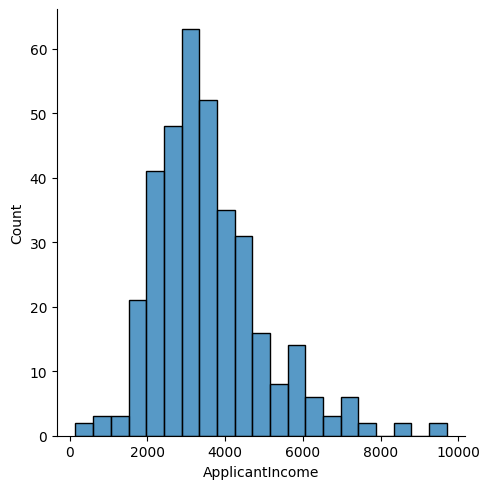

In [18]:
sns.displot(df_dummies_1['ApplicantIncome'])

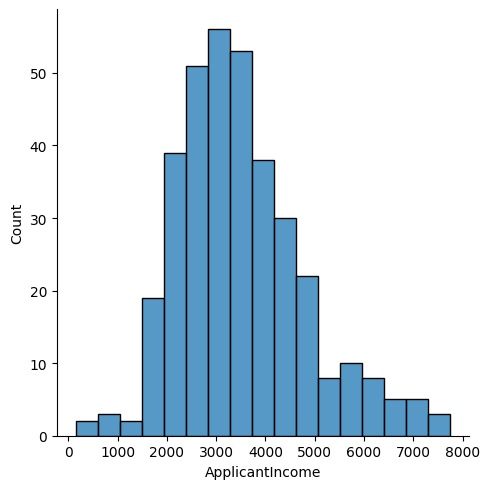

In [19]:
q = df_dummies_1['ApplicantIncome'].quantile(0.99)
df_dummies_1 = df_dummies_1[df_dummies_1['ApplicantIncome']<q]

sns.displot(df_dummies_1['ApplicantIncome'])

### CoapplicantIncome outliers

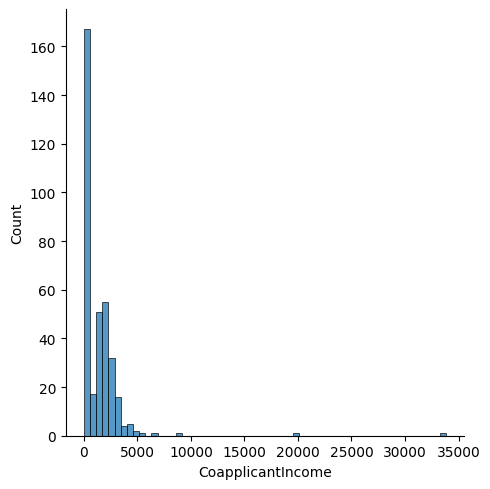

In [20]:
sns.displot(df_dummies_1['CoapplicantIncome'])

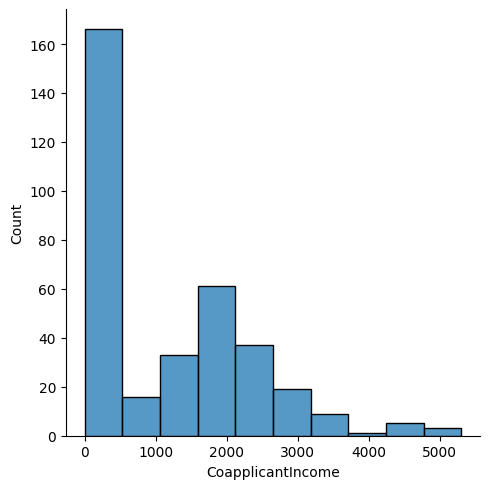

In [21]:
q = df_dummies_1['CoapplicantIncome'].quantile(0.99)
df_dummies_1 = df_dummies_1[df_dummies_1['CoapplicantIncome']<q]

sns.displot(df_dummies_1['CoapplicantIncome'])

### LoanAmount outliers

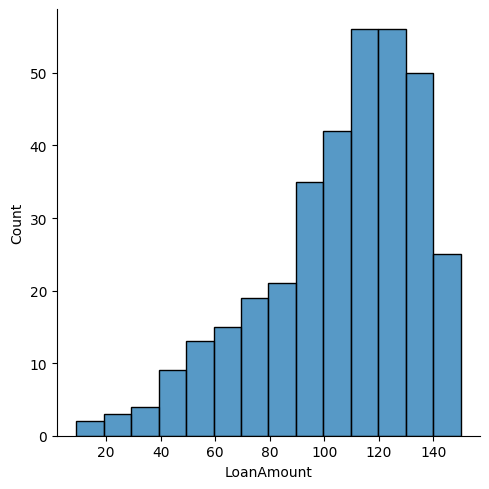

In [22]:
sns.displot(df_dummies_1['LoanAmount'])

### Loan_Amount_Term outliers

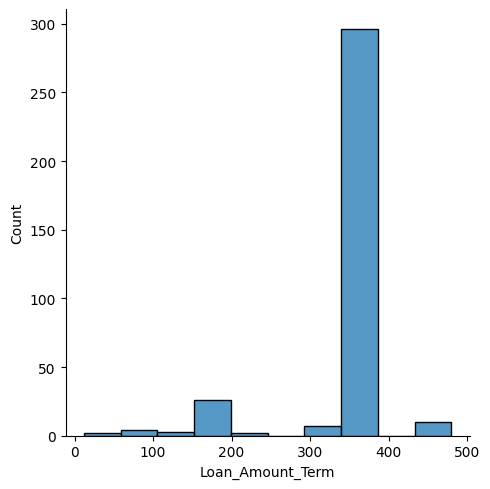

In [23]:
sns.displot(df_dummies_1['Loan_Amount_Term'])

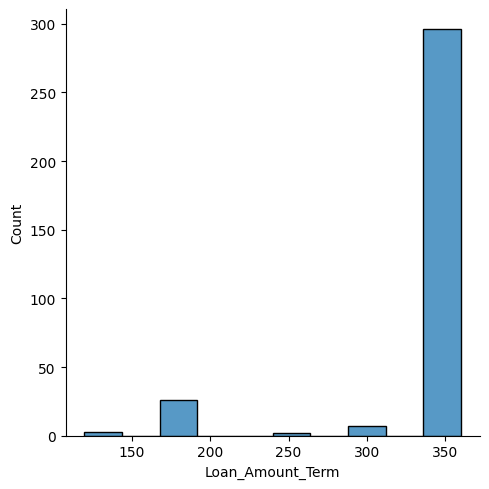

In [24]:
q = df_dummies_1['Loan_Amount_Term'].quantile(0.01)
df_dummies_1 = df_dummies_1[df_dummies_1['Loan_Amount_Term']>q]

q = df_dummies_1['Loan_Amount_Term'].quantile(0.99)
df_dummies_1 = df_dummies_1[df_dummies_1['Loan_Amount_Term']<q]

sns.displot(df_dummies_1['Loan_Amount_Term'])

#### Now we can scale our numeric columns

In [ ]:
from sklearn.preprocessing import StandardScaler

df_scaled = df_dummies_1.copy()

columns_to_scale = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

scaler = StandardScaler()

df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])

df_scaled

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,1,1,0,0.810451,0.325680,0.796507,0.338558,1,2,0
1,0,1,0,1,1,-0.413812,-0.914497,-1.331210,0.338558,1,1,1
2,0,1,0,0,0,-0.736313,1.024719,0.521963,0.338558,1,1,1
3,0,0,0,1,0,1.906332,-0.914497,1.242641,0.338558,1,1,1
4,0,1,0,0,0,-0.929658,0.332259,-0.335988,0.338558,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
353,0,1,3,1,0,1.676638,-0.914497,0.796507,0.338558,1,1,1
354,0,1,0,1,0,-0.234388,0.689180,0.110146,0.338558,1,2,1
355,1,0,0,1,0,-0.491151,-0.914497,-1.159620,0.338558,1,2,1
356,0,1,3,1,0,0.441548,-0.914497,-2.223479,-3.020210,1,2,1


In [26]:
df_scaled.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#### Targets & Inputs

In [27]:
targets = df_scaled['Loan_Status']
inputs = df_scaled.drop(['Loan_Status'], axis=1)

#### Train and test values

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=20)

#### Training model

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_train)

accuracy = accuracy_score(y_pred, y_train)
accuracy

0.846441947565543

#### Testing model

In [30]:
y_pred_test = model.predict(x_test)
accuracy_test = accuracy_score(y_pred_test, y_test)
accuracy_test


0.835820895522388

#### Confusion matrix

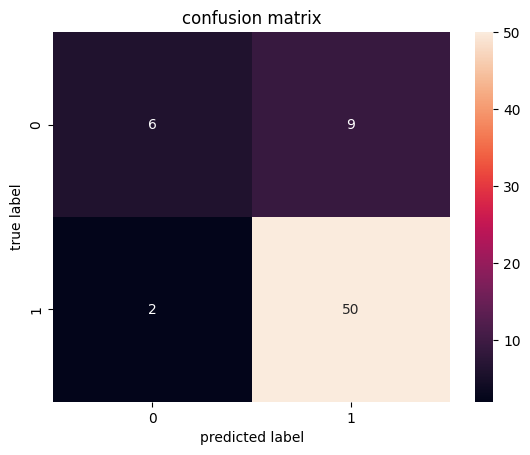

In [31]:
cm = confusion_matrix(y_test, y_pred_test)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.title("confusion matrix")
plt.show()

#### Classification report

In [33]:
df_report = pd.DataFrame(classification_report(y_test, y_pred_test, output_dict=True)).transpose()
df_report

,precision,recall,f1-score,support
0,0.750000,0.400000,0.521739,15.000000
1,0.847458,0.961538,0.900901,52.000000
accuracy,0.835821,0.835821,0.835821,0.835821
macro avg,0.798729,0.680769,0.711320,67.000000
weighted avg,0.825639,0.835821,0.816014,67.000000


#### Save out cleaned dataset & classification report

In [34]:
df_scaled.to_csv('data_cleaned.csv', index=False)

In [35]:
df_report.to_csv('classification_report_not_balancing.csv')